In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv('./data/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(['RowNumber','CustomerId'], axis=1, inplace=True)

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [9]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df_object = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric.drop(['IsActiveMember','Exited','HasCrCard'], axis=1, inplace=True)

In [11]:
df_numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


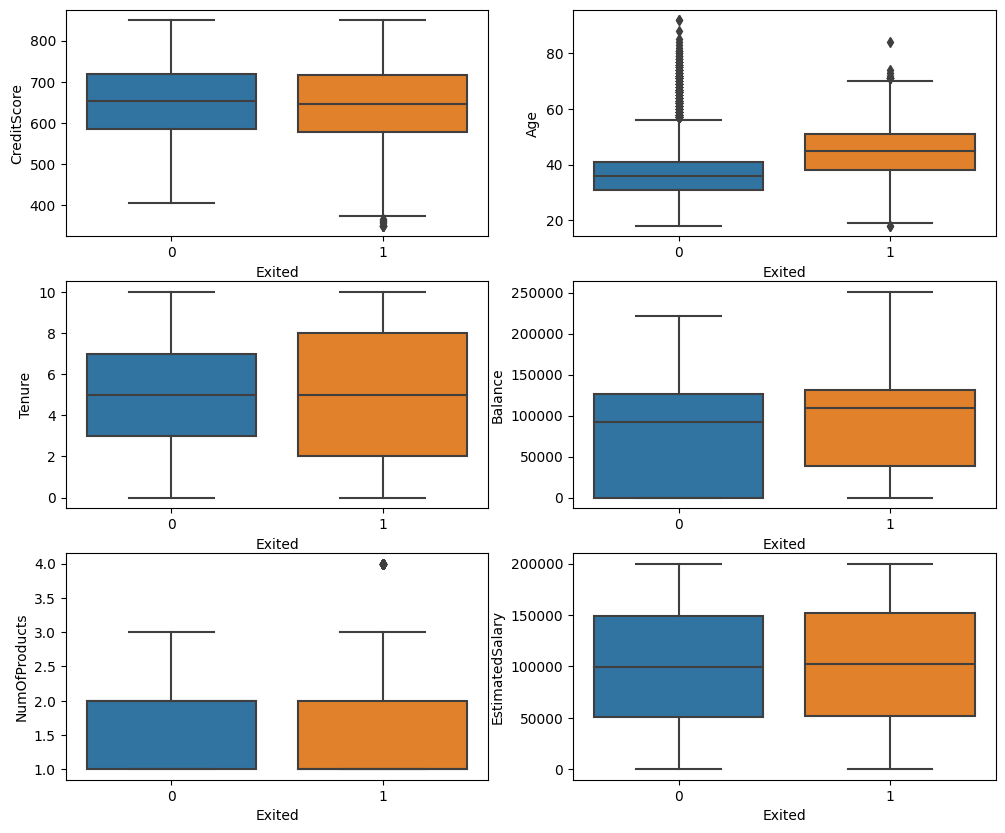

In [12]:
plt.figure(figsize=(12,10))
for index, column in enumerate(df_numeric):
    plt.subplot(3,2,index+1)
    sns.boxplot(x='Exited', y=column, data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Balance'>

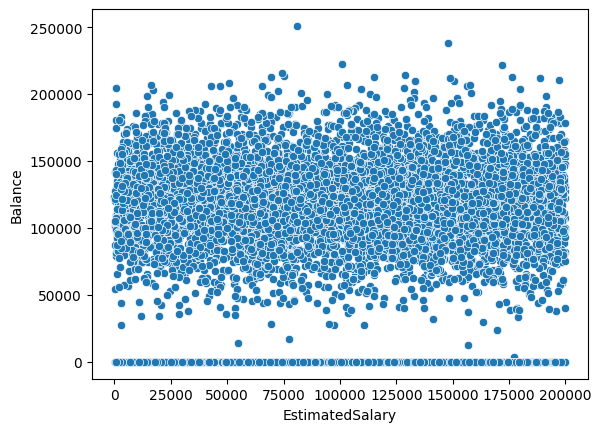

In [13]:
sns.scatterplot(x='EstimatedSalary',y='Balance', data=df)

In [14]:
df_posbalance = df[df['Balance']>0]

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

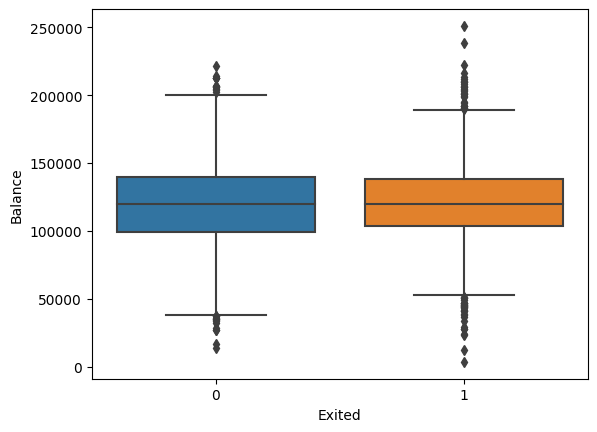

In [15]:
sns.boxplot(x='Exited', y='Balance', data=df_posbalance)

C:\Users\melis\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

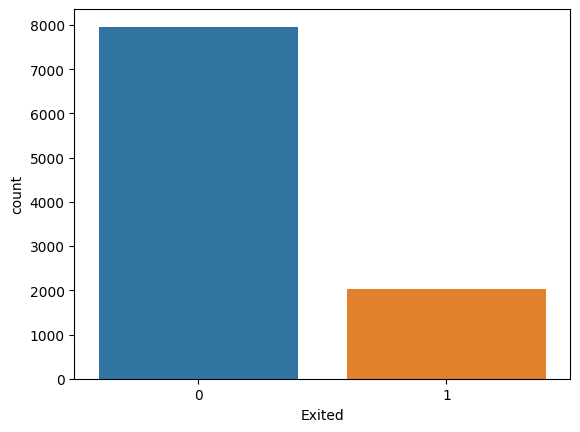

In [16]:
sns.countplot(df['Exited'])

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

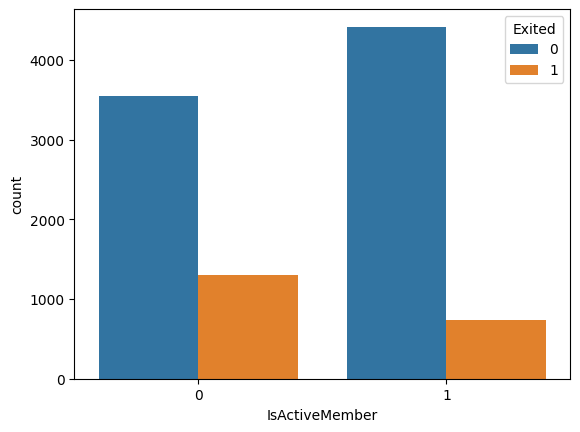

In [62]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

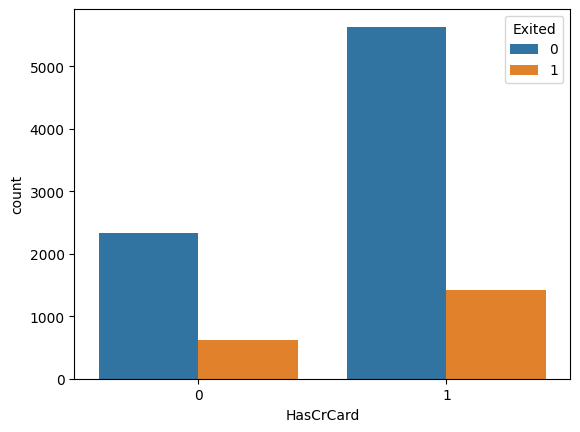

In [65]:
sns.countplot(x='HasCrCard',hue='Exited',data=df)

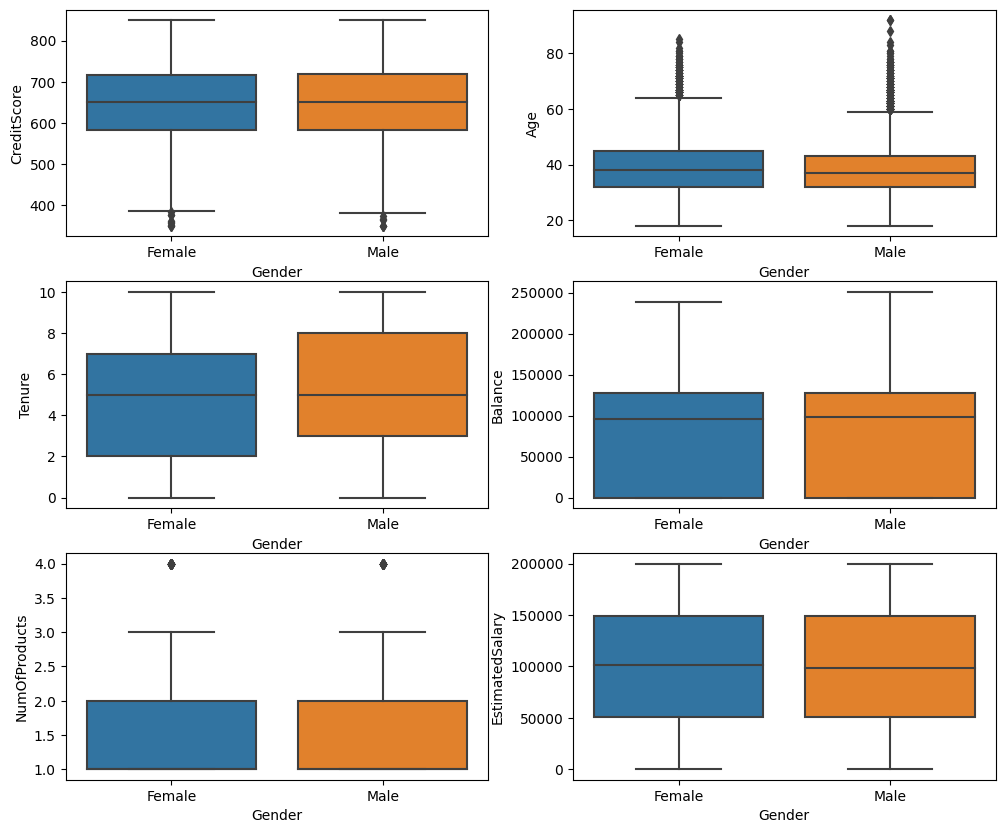

In [28]:
plt.figure(figsize=(12,10))
for index, column in enumerate(df_numeric):
    plt.subplot(3,2,index+1)
    sns.boxplot(x='Gender', y=column, data=df)

# Country

In [119]:
percentage_list = []
country_list = []
for country in df.Geography.unique():
    country_list.extend([country,country])
    country_exit = df[(df['Geography']==country) & (df['Exited']==1)]
    country_stay = df[(df['Geography']==country) & (df['Exited']==0)]
    ex_card_per = country_exit[country_exit['HasCrCard']==1].shape[0] / country_exit.shape[0] 
    st_card_per = country_stay[country_stay['HasCrCard']==1].shape[0] / country_stay.shape[0] 
    ex_act_per = country_exit[country_exit['IsActiveMember']==1].shape[0] / country_exit.shape[0] 
    st_act_per = country_stay[country_stay['IsActiveMember']==1].shape[0] / country_stay.shape[0] 
    ex_list = [1, ex_card_per, ex_act_per]
    st_list = [0, st_card_per, st_act_per]
    percentage_list.extend([ex_list, st_list])
country_df = pd.DataFrame(percentage_list, index=country_list , columns=['Exited', 'HasCrCard','IsActiveMember'])

In [122]:
country_df.sort_values(by='Exited')

,Exited,HasCrCard,IsActiveMember
France,0,0.707422,0.545433
Spain,0,0.699128,0.567345
Germany,0,0.716224,0.561652
France,1,0.702469,0.367901
Spain,1,0.673123,0.341404
Germany,1,0.708845,0.363636


In [125]:
df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

# Model

In [14]:
rfc = RandomForestClassifier(n_estimators=20)

In [15]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [16]:
X = pd.get_dummies(X, drop_first=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [23]:
preds = rfc.predict(X_test)

In [21]:
rfc.score(X_train, y_train)

0.994

In [22]:
rfc.score(X_test, y_test)

0.855

In [26]:
report_dict = classification_report(y_test, preds, output_dict=True)

In [34]:
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.855721,0.981611,0.914353,1577.000
1,0.848168,0.382979,0.527687,423.000
accuracy,0.855000,0.855000,0.855000,0.855
macro avg,0.851944,0.682295,0.721020,2000.000
weighted avg,0.854124,0.855000,0.832573,2000.000


In [30]:
report_df.head(3)

,precision,recall,f1-score,support
0,0.855721,0.981611,0.914353,1577.000
1,0.848168,0.382979,0.527687,423.000
accuracy,0.855000,0.855000,0.855000,0.855


In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1577
           1       0.85      0.38      0.53       423

    accuracy                           0.85      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



<AxesSubplot:>

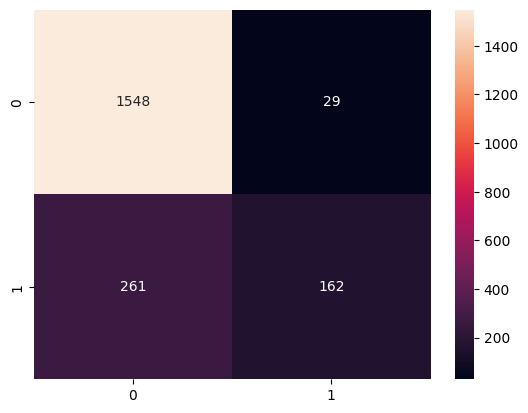

In [42]:
sns.heatmap(confusion_matrix(y_test, preds), annot= True, fmt='.4g')

In [49]:
162 / (261 + 162), 1548 / (1548 + 29)

(0.3829787234042553, 0.9816106531388713)

In [52]:
1548 / (1548 + 262), 162 / (162 + 29)

(0.8552486187845304, 0.8481675392670157)

In [ ]:
MODEL ,  CLASS, PRECISION, RECALL, F1SCORE SUPPORT ACCURACY??
e1rfc1 ,  0
e1rfc1 ,  1
e1rfc1 ,  2
e1rfc2 ,  0
e1rfc2 ,  1
e1rfc2 ,  2


In [37]:
1548 + 29

1577

In [40]:
1548 / 1809, 1548 / 1577

(0.8557213930348259, 0.9816106531388713)

In [39]:
1548 + 261

1809